In [1]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
!pip install scikit-learn

In [5]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housing_df['PRICE'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
print('캘리포니아 주택 가격 데이터셋 크기: ',housing_df.shape)

캘리포니아 주택 가격 데이터셋 크기:  (20640, 9)


In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
Y = housing_df['PRICE']
X = housing_df.drop(['PRICE'], axis = 1, inplace = False)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 156)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
Y_predict = lr.predict(X_test)

In [18]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.543, RMSE : 0.737
R^2(Variance score) : 0.595


In [19]:
print('Y절편: ', lr.intercept_)
print('회 계수 값: ', np.round(lr.coef_, 1))

Y절편:  -37.239053052941664
회 계수 값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [20]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

AveBedrms     0.60
MedInc        0.43
HouseAge      0.01
Population   -0.00
AveOccup     -0.01
AveRooms     -0.10
Latitude     -0.43
Longitude    -0.44
dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

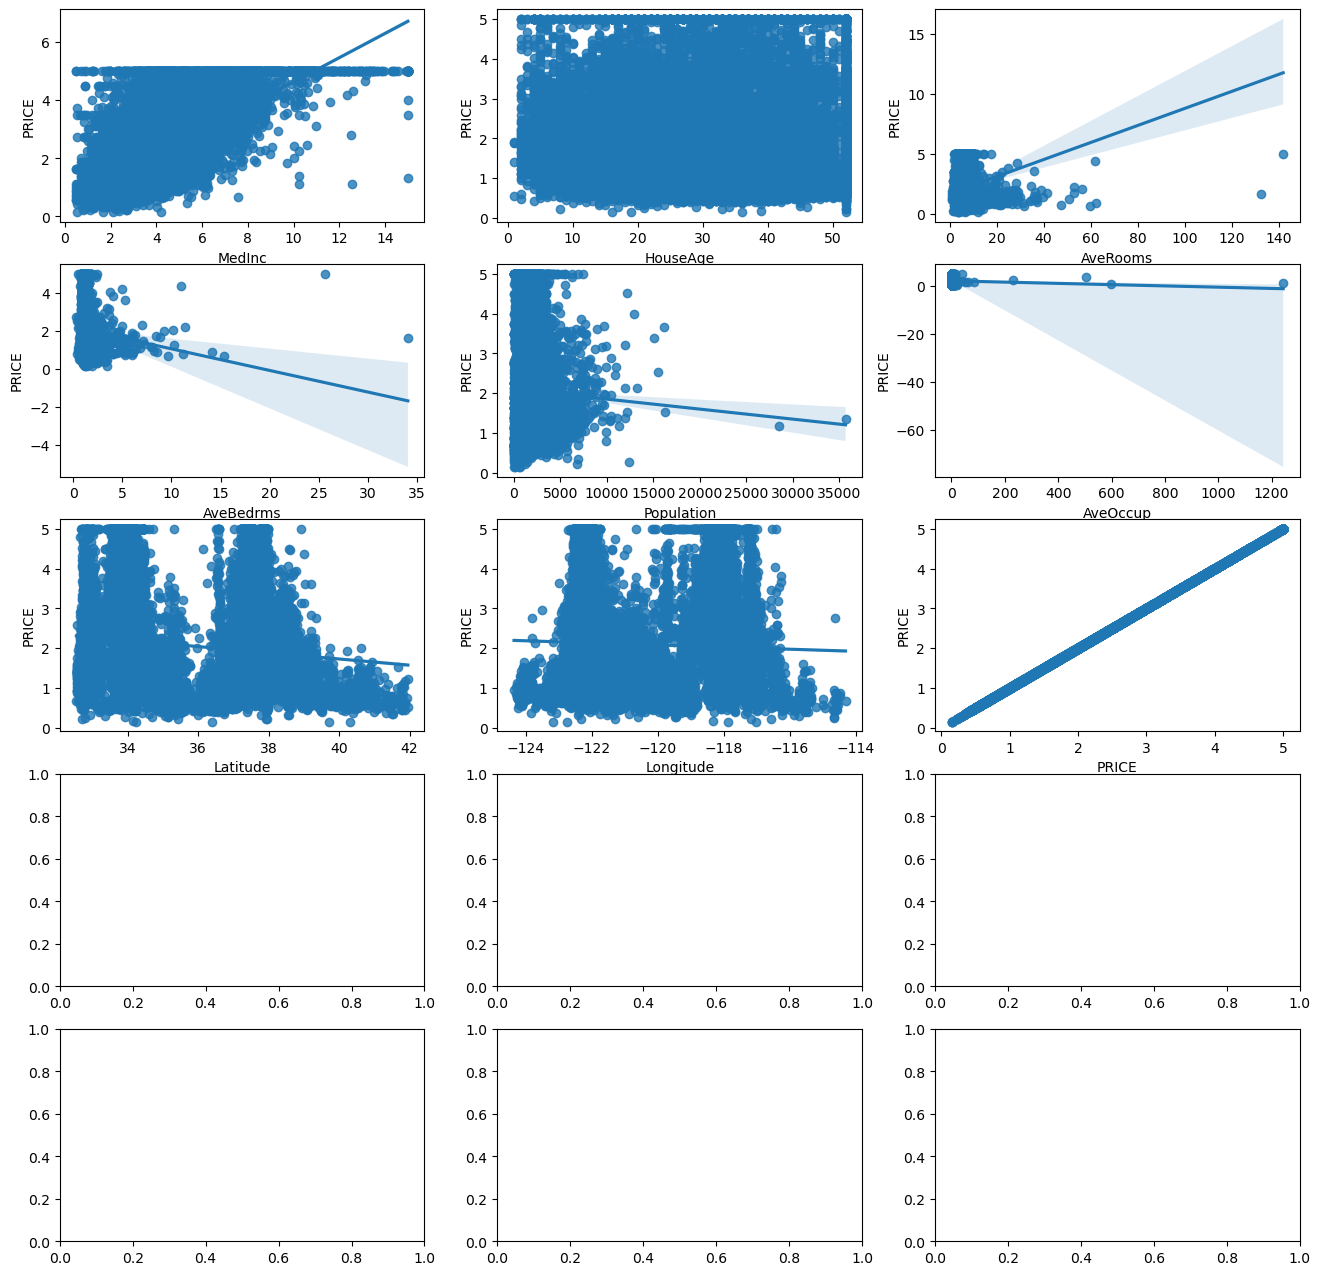

In [28]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)

x_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'PRICE']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'PRICE', data = housing_df, ax=axs[row][col])

In [27]:
print(housing_df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')


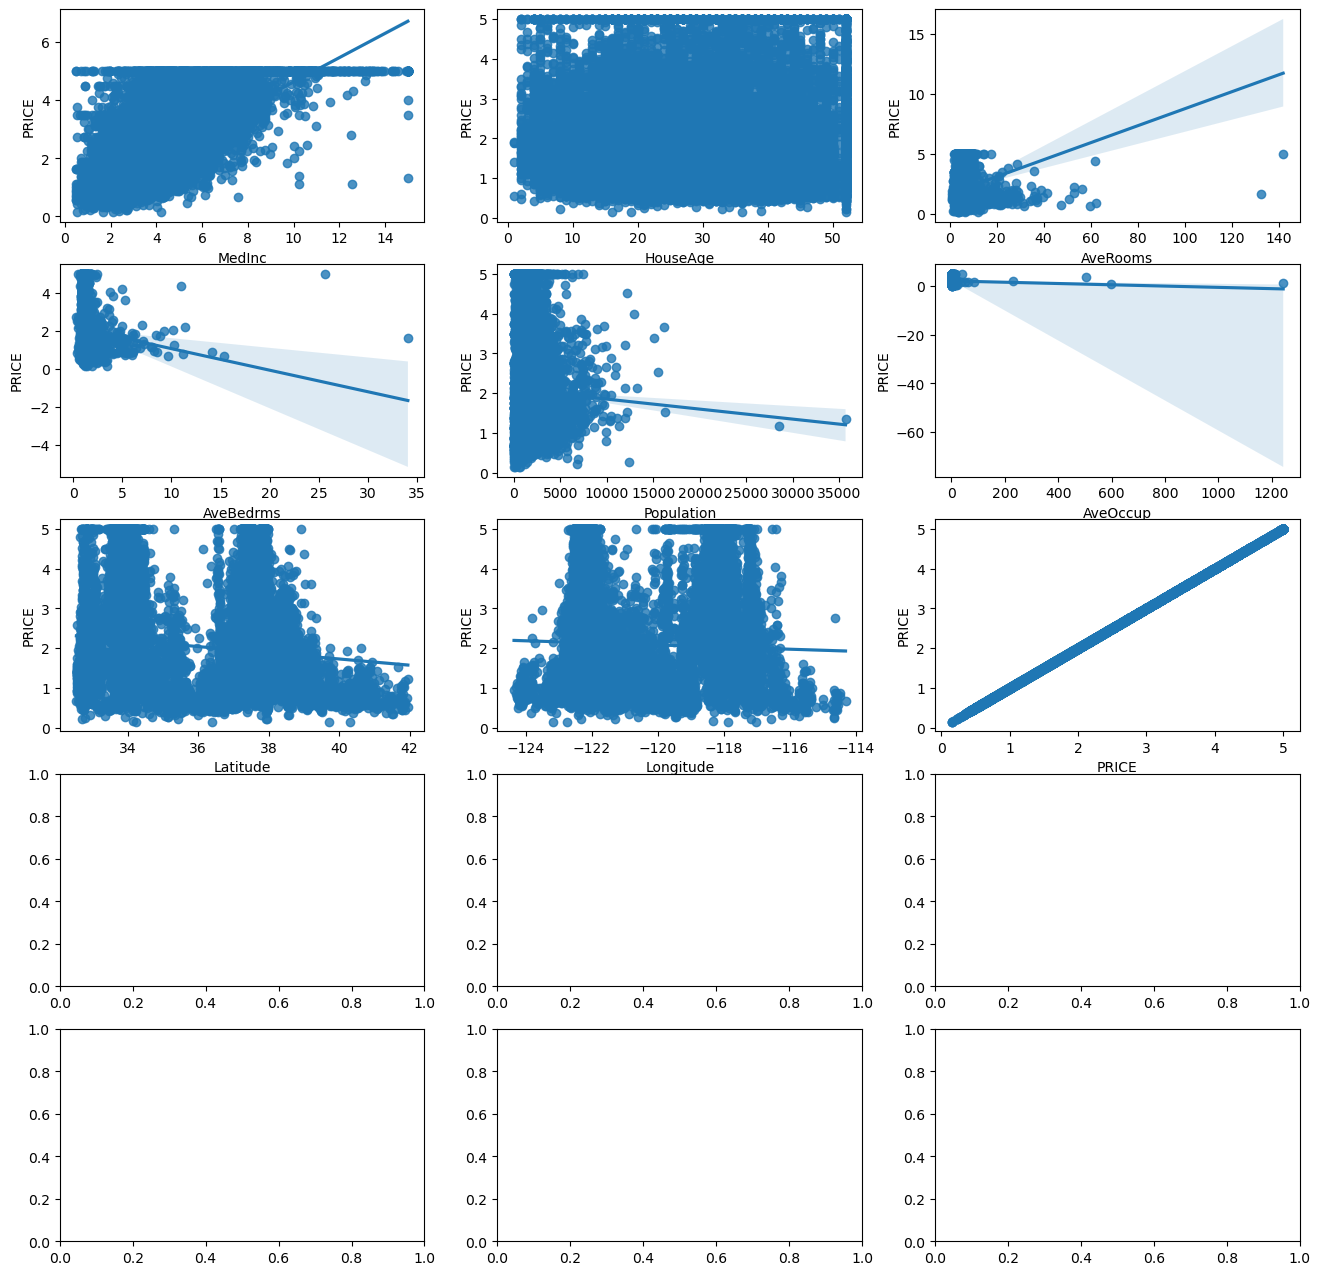

In [29]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)

x_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'PRICE']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'PRICE', data = housing_df, ax=axs[row][col])